# Linear Regression

## A.1: Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [ ]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

This data is generated from the canonical generating process assumed for linear regression: a gaussian distribution centered at the regression line on the y axis.

In [ ]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       bias=0.0,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [ ]:
X.shape,y.shape

((100, 1), (100,))

We are fitting a model with an intercept. Lets see what it is.

In [ ]:
coef

array(80.88336208)

We can plot the data.

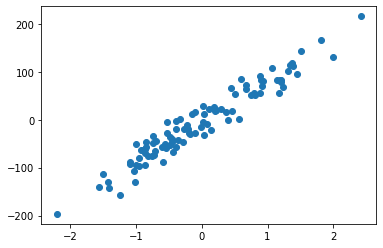

In [ ]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [ ]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

In [ ]:
Xgrid[:5]

array([[-2.5       ],
       [-2.49499499],
       [-2.48998999],
       [-2.48498498],
       [-2.47997998]])

In [ ]:
Xgrid[499]

array([-0.0025025])

## A.2: Fit using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X,y) # fit the model with the existing data
ypgrid = lr.predict(Xgrid) # now predict it on the grid
lr.coef_, lr.intercept_ # get the slope and the intercept

(array([82.90456142]), -3.709228868670302)

Notice that the slope and the intercept are not what we fed into the model, but close. This is because the model fitted depends on the exact way points were generated..

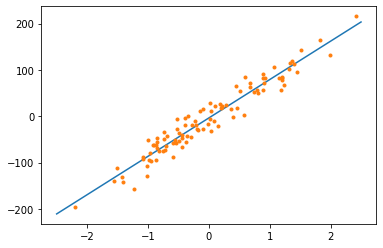

In [ ]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, lr.predict(X))

0.9342344891672815

## A.3: Train vs Test Split

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set. Then we want to guarantee that there is no overlap between the initial sample, or **training set**, and the test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2022)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [ ]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr2.predict(Xtest))
r2_train = r2_score(ytrain, lr2.predict(Xtrain))

In [ ]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

'Train R2 is 0.9340719025066724, while test R^2 is 0.9312454821103248'

## B: Multi-Linear Regression on the ads dataset

Let us first import the dataset.

In [ ]:
#import necessary libraries
import pandas as pd
from sklearn import preprocessing
from prettytable import PrettyTable

Reading the dataset:

In [ ]:
#Read the file "Advertising.csv"
df = pd.read_csv("https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Regression/Advertising.csv")

In [ ]:
#Take a quick look at the data to list all the predictors
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Let us now run multi-linear regression with Sales as the reponse variable Y. We will actually do so for all possible sets of predictor variables: from only considering individual TV, Radio, Newspaper values to all of them taken together. This is to illustrate how our R2 scores can change based on how many predictor variables we have.

In [ ]:
#List to store the r2score values
r2_list = []

#List of all predictor combinations to fit the curve
cols = [['TV'],['Radio'],['Newspaper'],['TV','Radio'],['TV','Newspaper'],['Radio','Newspaper'],['TV','Radio','Newspaper']]

for i in cols:
    #Set each of the predictors from the previous list as x
    x_ads = df[i].to_numpy()
    
    
    #"Sales" column is the reponse variable
    y_ads = df["Sales"].to_numpy()
    
   
    #Splitting the data into train-test sets with 80% training data and 20% testing data. 
    #Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.2, random_state=2022)

    #Create a LinearRegression object and fit the model
    lr3 = LinearRegression()
    lr3 = LinearRegression().fit(x_train, y_train) # fit the model on train data
    r2_test = r2_score(y_test, lr3.predict(x_test)) # compute the score on test data
    
    #Append the R2Score to the list
    r2_list.append(r2_test)


In [ ]:
t = PrettyTable(['Predictors', 'R2Scores'])

#Loop to display the predictor combinations along with the R2 score of the corresponding model
for i in range(len(r2_list)):
    t.add_row([cols[i],r2_list[i]])
print(t)

+------------------------------+----------------------+
|          Predictors          |       R2Scores       |
+------------------------------+----------------------+
|            ['TV']            |  0.6786607113562172  |
|          ['Radio']           |  0.4284862513631944  |
|        ['Newspaper']         | 0.052602982349486016 |
|       ['TV', 'Radio']        |  0.9442095799466792  |
|     ['TV', 'Newspaper']      |  0.7000430939023141  |
|    ['Radio', 'Newspaper']    |  0.4288348868829509  |
| ['TV', 'Radio', 'Newspaper'] |  0.944243563428613   |
+------------------------------+----------------------+


## C: Multilinear regression on California Housing Dataset



####The California Housing Dataset consists of the following columns

1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea

Reading the dataset:

In [ ]:
#Read the file "housing.csv"
df_housing = pd.read_csv("https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Regression/housing.csv")

In [ ]:
#Take a quick look at the data to list all the predictors
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Take a quick look at the datatypes of the predicators
df_housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Checking for Null/Empty Values:

In [ ]:
# isnull() function returns True if that element is missing in the dataframe, False otherwise
df_housing.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Apply sum function to detect which columns have missing elements
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Observe that the feature total_bedrooms has 207 NULL/empty values, these need to be dealt with before applying any model

In [ ]:
# Checking for the median of total_bedrooms column

df_housing.total_bedrooms.median()

435.0

In [ ]:
# Replacing the empty values with the median of that column is one of the common ways to deal with it

df_housing.total_bedrooms=df_housing.total_bedrooms.fillna(df_housing.total_bedrooms.median())

In [ ]:
# Sanity check to be sure whether the missing values are dealt with.

df_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Dealing with Categorcial Features

Machine Learning models in general can only deal with numeric values as input, so to deal with categorical variables, we need to encode them into some numberic representation. One of the most commonly used methodology is **One Hot Encoding**.


**Before Applying One Hot Encoding:**

<table width="200px">
  <tr>
    <th>Color</th>
  </tr>
  <tr>
    <td>Red</td>
  </tr>
  <tr>
    <td>Blue</td>
  </tr>
  <tr>
    <td>Green</td>
  </tr>
  <tr>
    <td>Red</td>
  </tr>
  
</table>

**After Applying One Hot Encoding:**
<table width="400px">
  <tr>
    <th>Color_Red</th>
    <th>Color_Blue</th>
    <th>Color_Green</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    
  </tr>
  <tr>
      <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  
  <tr>
     <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
     <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  
</table>

In [ ]:
# Use pd.get_dummies() function to one hot encode the categorical variable "ocean_proximity"

df_housing=pd.get_dummies(df_housing,columns=['ocean_proximity'])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


What scale to use?<br>
For many regression problems the numerical range of values could lead to wild coefficients. For instance, the CA longitude values are all in a tiny range from [-122.2x to -122.2y] so the differences are only in the second decimal place! To mitigate such issues, one often scales the entires using some standard transformations (e.g., subtract mean, scale by std. deviation). Here we will put all entries in the interval [0,1] by subtracting the min and dividing by the range.


As it can be observed, the range of values the predictors can vary a lot,which can make it difficult to interpret the coefficients of the model. So its a good practice to Standardize the data between 0 and 1. For this we make use of of sklearn's MinMaxScaler<br>
MinMax Scaling is achieved using the following formula:<br>
<center> $\frac{(X-X.min)}{(X.max-X.min)}$</center>
where X is one of the predictors in the dataFrame


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the dataset using MinMaxScaler,it returns a numpy ndarray
# Convert it back to Pandas DataFrame, making it convinient to split it into predictors and response variables later

df_housing_scaled=MinMaxScaler().fit_transform(df_housing)
df_housing_scaled=pd.DataFrame(df_housing_scaled,columns=df_housing.columns)

In [ ]:
df_housing_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0


<h3>CODING BREAKOUT</h3>

df_housing_scaled contains the Pandas DataFrame for California Housing Dataset, you need to seperately store the predictor variables and response variable in X and y respectively.

In [ ]:
# your code here
y = df_housing_scaled["median_house_value"]
X = df_housing_scaled.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.0


Split the Data into train and test set, with test_size=20% and random_state=2022 to reproduce the results

In [ ]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2022)


Print the shapes of X_train, y_train, X_test and y_test

In [ ]:
# your code here
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 13), (16512,), (4128, 13), (4128,))

Fit the Linear Regression Model on Training Data

In [ ]:
# your code here
lr4 = LinearRegression().fit(X_train, y_train)

Print the Coefficients of the model

In [ ]:
# your code here
lr4.coef_


array([-0.55353194, -0.49574263,  0.10837715, -0.35415716,  0.91912314,
       -2.94809362,  1.00622849,  1.15284877, -0.0414593 , -0.12308334,
        0.24592682, -0.04890539, -0.0324788 ])

Compute R<sup>2</sup> for training and test set

In [ ]:
# your code here


**Breakout Ends here**

**Things to Remember before fitting a Model**<br>


1.   Always check for NULL values in the dataset, these empty values cause issues when fitting a model and need to be dealt with before hand. Usual approach to deal with numeric values is to replace the the NULL value with Mean/Median of the column, whereas for categorical data, the simplest approach is to eliminate the entire corrosponding row.<br> **Note:** There are multiple approaches to deal with NULL values and is not limited to the approaches mentioned, it depends on various factors such as task to be solved, availability of data etc. 
2.   Check for Categorical variables in the dataset, if present, deal with them using techniques such as One Hot Encoding. Remember sometimes categories can be Numbers such as Category 1,2,3 etc. We should treat them as categories and deal with them accordingly.
3. Its also a good practice to Scale/Normalize your predictors especially when there is lot of variation between variables. Some standard approaches to scale your predictors are MinMaxScaling, StandardScalar etc.




## D: Model Confidence

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [ ]:
sample_indices = np.random.choice(range(100), size=20, replace=False)
sample_indices

array([10, 72, 73,  3, 85, 22, 20, 19, 61, 16, 87, 42, 35, 54, 25, 48,  7,
       31, 77, 95])

In [ ]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       bias=0.0,
                       coef=True)

We create a sample by using the sample indices:

In [ ]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

**Find the $R^2$ score of a fit to this sample, on this sample**

In [ ]:
lr_s = LinearRegression().fit(Xsample, ysample)
lr_s.score(Xsample, ysample)

0.9385802691806621

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times..that is we'll sample a new set of 20 points, 

(0.7, 1.0)

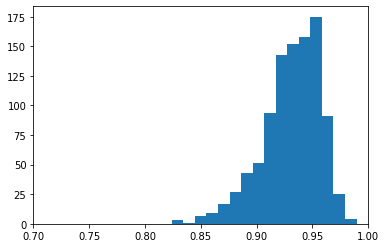

In [ ]:
scores = []
models=[]
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20, replace=False)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    m = LinearRegression().fit(Xsample, ysample)
    models.append(m)
    scores.append(m.score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Let us check the slope and intercepts fitted on the different samples

(60.0, 100.0)

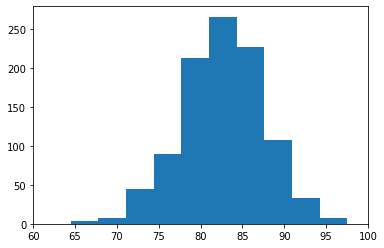

In [ ]:
plt.hist([models[i].coef_[0] for i in range(1000)], bins=10);
plt.xlim([60, 100])

(-15.0, 10.0)

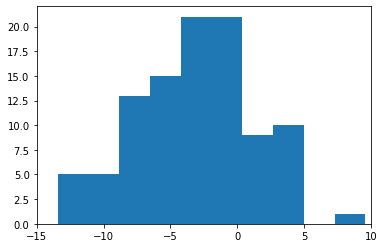

In [ ]:
plt.hist([models[i].intercept_ for i in range(100)], bins=10);
plt.xlim([-15, 10])